In [14]:
#importing liabrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing  import power_transform
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Japan_used_cars_datasets.csv")

In [15]:
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [16]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [19]:
#Checking all Null Values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

<AxesSubplot:>

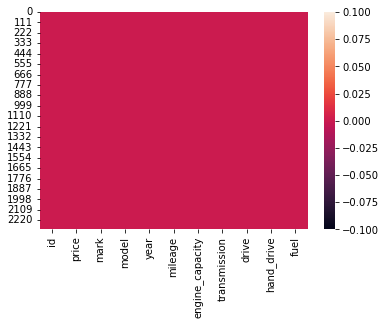

In [41]:
# checking Null By Heatmap
sns.heatmap(df.isnull())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [21]:
#Checking Data Type
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [23]:
print(df.head())
print(df.index)
print(df.columns)

   id  price      mark    model  year  mileage  engine_capacity transmission  \
0   0     80    nissan    march  2003    80000             1240           at   
1   1    110    nissan    march  2010    53000             1200           at   
2   2    165    nissan  lafesta  2005    47690             2000           at   
3   3    190    toyota  avensis  2008   130661             1990           at   
4   4    190  daihatsu     mira  2006    66300              660           at   

  drive hand_drive      fuel  
0   2wd        rhd  gasoline  
1   2wd        rhd  gasoline  
2   2wd        rhd  gasoline  
3   2wd        rhd  gasoline  
4   2wd        rhd  gasoline  
RangeIndex(start=0, stop=2318, step=1)
Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')


In [24]:
df.shape

(2318, 11)

In [25]:
df.isnull().any()

id                 False
price              False
mark               False
model              False
year               False
mileage            False
engine_capacity    False
transmission       False
drive              False
hand_drive         False
fuel               False
dtype: bool

In [26]:
#Nothing seems to be missing

In [27]:
df.engine_capacity.unique()

array([ 1240,  1200,  2000,  1990,   660,  3190,  1800,   650,  2490,
        2030,  1500,  1000,     9,   990,  2390,  1700,  1290,  2990,
        1980,  1300,  1330,  1600,  2970,  1400,  1430,  2320,  1790,
        1490,  1460,  1320,  2400,  1380,  2200,  3000,  2300,  1296,
        1496,  1297,  2500,   690,  3500,  2190,  2450,  1590,  2499,
        1799,  1780,  3100,  2730,  1480,  3530,  1970,  1794,  3200,
        2260,  2350,  1190,  2180,  1660,  1991,   550,  1410,  1242,
        1498,  1986,   798,  1587,  1998,  1270,  2700,  2520,  2360,
        1997,  1830,  1762,  2480,  3470,  3690,  3490,  3160,  1340,
        2476,   996, 12340,  4500,  1390,  1599,  1493,  4890,  3050,
        2100,  2497,  1999], dtype=int64)

In [30]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [32]:
df['mark'].value_counts()

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64

In [33]:
df['transmission'].value_counts()


at     2171
mt      117
cvt      30
Name: transmission, dtype: int64

In [34]:
df['fuel'].value_counts()

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64

In [35]:
df['mark'].value_counts()

toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford                1
gm                  1
citroen             1
opel                1
chrysler            1
kubota              1
jaguar              1
Name: mark, dtype: int64

In [36]:
df['price'].describe()

count    2318.000000
mean      971.522433
std       288.673112
min        80.000000
25%       776.000000
50%      1000.000000
75%      1213.000000
max      1400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

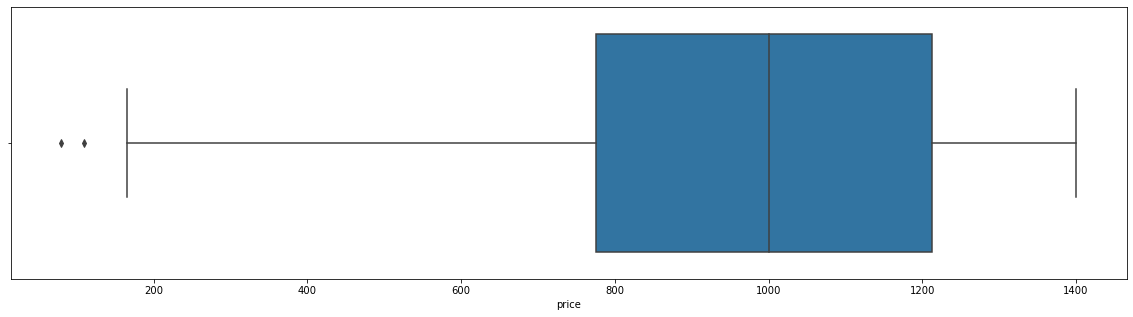

In [37]:
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

In [42]:
(df=='-').sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [43]:
#Checking total number of unique value in each column of Dataset
df.nunique()

id                 2318
price               354
mark                 28
model               258
year                 30
mileage            1367
engine_capacity      93
transmission          3
drive                 3
hand_drive            3
fuel                  5
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [45]:
#Checking all values in each columns
for i in df.columns:
    print(df[i].value_counts(),"\n\n", "-"*100, "\n\n")

0       1
1609    1
1557    1
1558    1
1559    1
       ..
781     1
782     1
783     1
784     1
2335    1
Name: id, Length: 2318, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


850     71
790     58
1306    57
1120    56
1220    45
        ..
1121     1
1122     1
1123     1
1127     1
80       1
Name: price, Length: 354, dtype: int64 

 ---------------------------------------------------------------------------------------------------- 


toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
volvo               2
land rover          2
peugeot             2
hino                1
mitsuoka            1
ford             

In [46]:
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


<AxesSubplot:xlabel='count', ylabel='mark'>

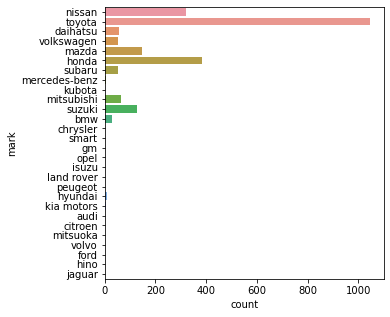

In [48]:
#Count Plot for "Brand" column
plt.figure(figsize=(5,5))
sns.countplot(y="mark",data=df)

<AxesSubplot:xlabel='count', ylabel='model'>

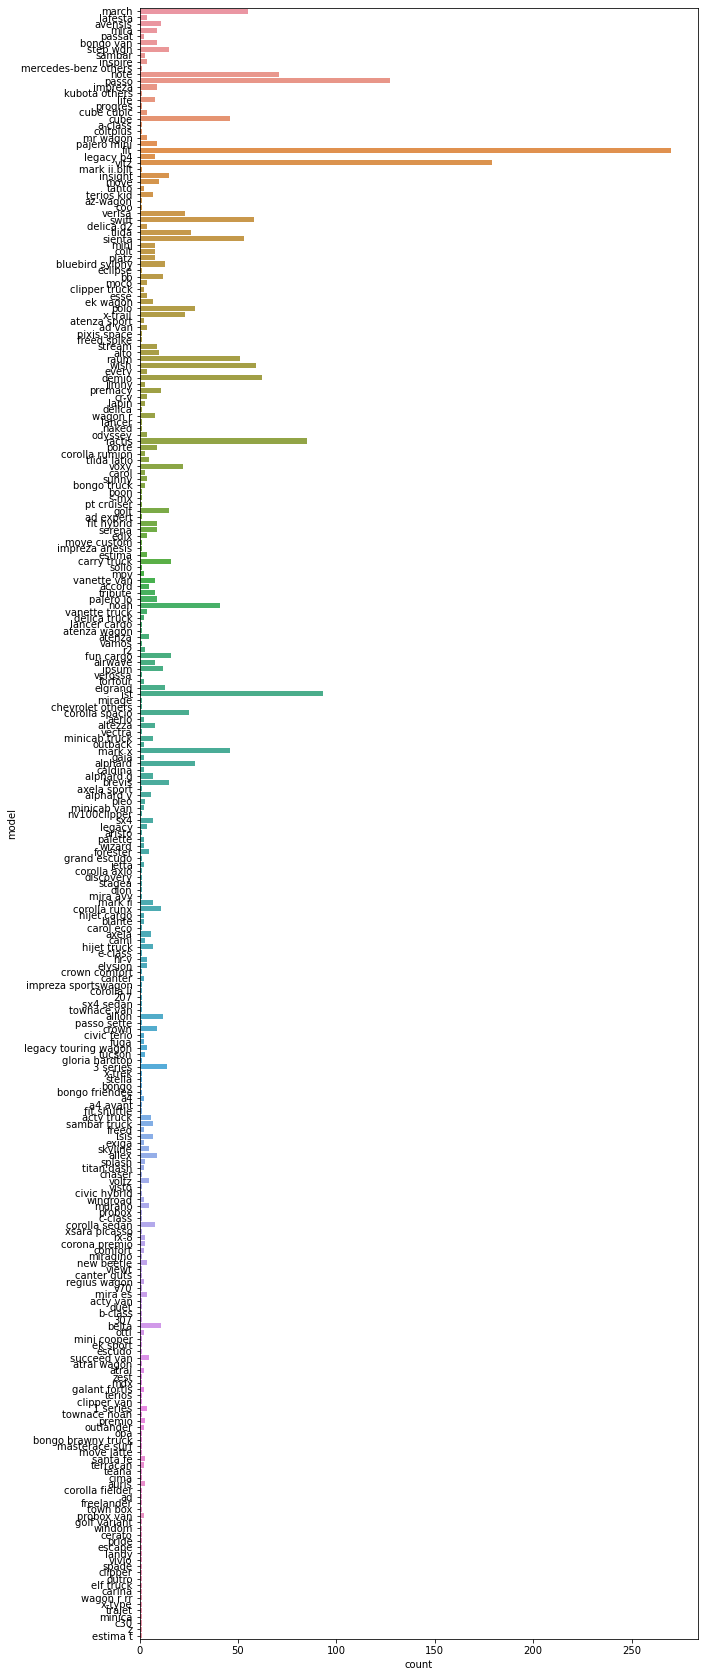

In [50]:
#Count Plot for "Model" column
plt.figure(figsize=(10,30))
sns.countplot(y="model",data = df)

In [51]:
#We can see Toyota Model Car is available most as compare to other Brand

<AxesSubplot:xlabel='year', ylabel='count'>

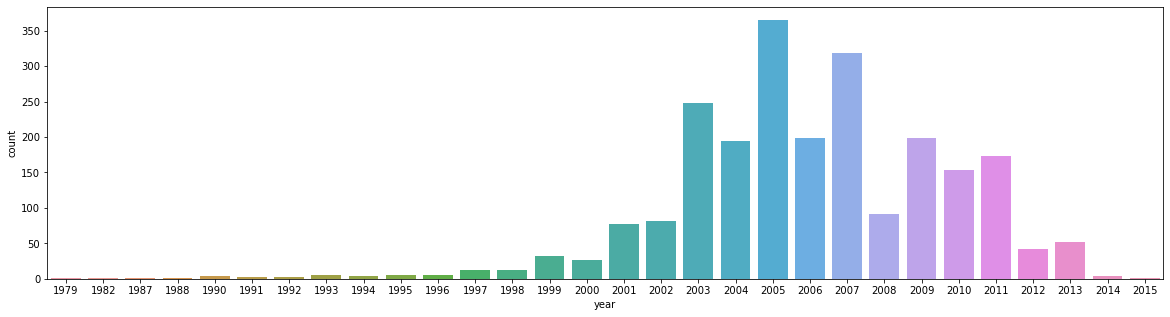

In [52]:
#Count Plot for "Manufacturing_Year" column
plt.figure(figsize=(20,5))
sns.countplot(x="year",data=df)

In [53]:
#We can see cars manufactured in 2017 is available most

<AxesSubplot:xlabel='price', ylabel='count'>

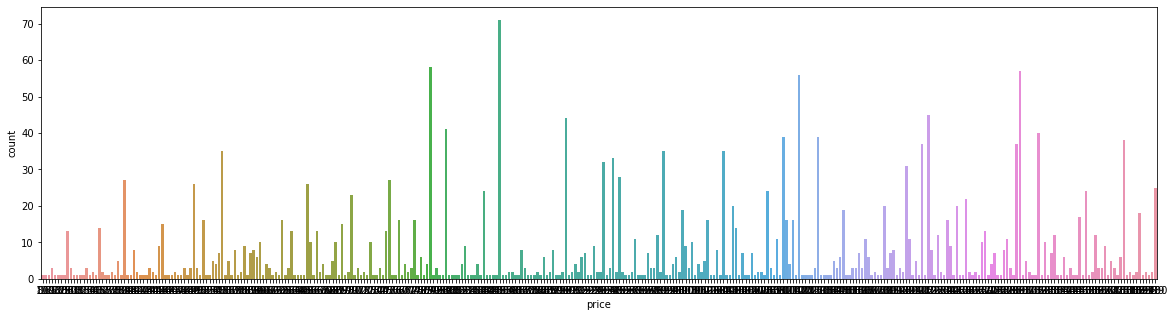

In [56]:
plt.figure(figsize=(20,5))
sns.countplot(x="price",data=df)

In [57]:
df['price'].value_counts()

850     71
790     58
1306    57
1120    56
1220    45
        ..
1121     1
1122     1
1123     1
1127     1
80       1
Name: price, Length: 354, dtype: int64

Text(0.5, 1.0, 'Car Price Distribution Plot')

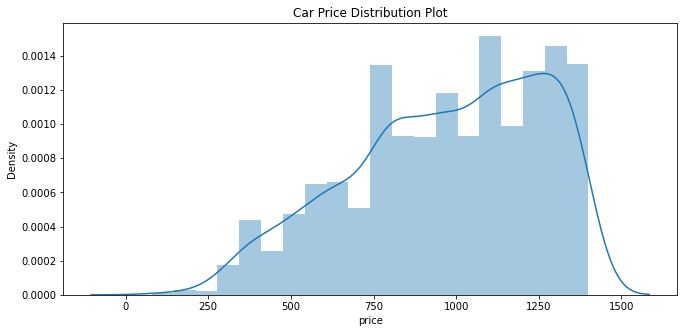

In [60]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(df['price'])
plt.title('Car Price Distribution Plot')

In [62]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

Text(0.5, 1.0, 'EngineV Distribution Plot')

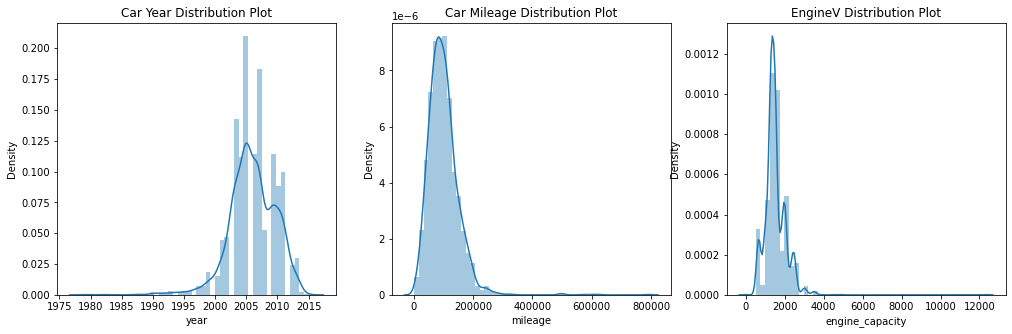

In [64]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df['year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df['mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df['engine_capacity'])
plt.title('EngineV Distribution Plot')

In [66]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df['price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df[df['price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

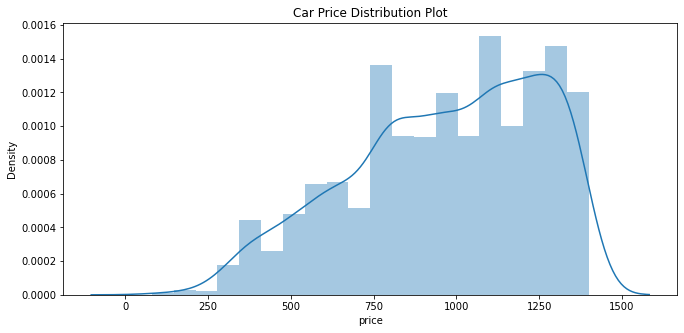

In [68]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(data_1['price'])
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'Car Mileage Distribution Plot')

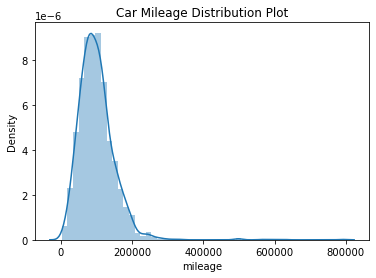

In [70]:
#Now we can treat the other numerical variables outlier in a similar way
sns.distplot(df['mileage'])
plt.title('Car Mileage Distribution Plot')

In [71]:
q = data_1['mileage'].quantile(0.99)
data_2 = data_1[data_1['mileage']<q]

<AxesSubplot:xlabel='mileage', ylabel='Density'>

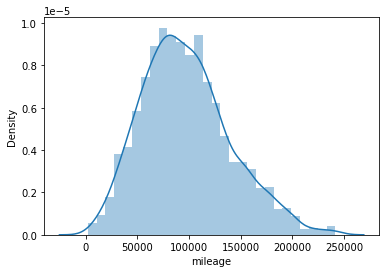

In [73]:
# Hurray this plot looks kind of normal
sns.distplot(data_2['mileage'])

<AxesSubplot:xlabel='year', ylabel='Density'>

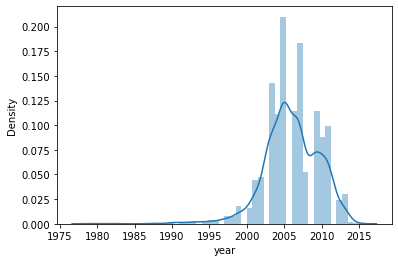

In [74]:
# In this scenario outliers are on the low end
sns.distplot(df['year'])

In [75]:
q = data_2['year'].quantile(0.01)
data_3 = data_2[data_2['year']>q]

<AxesSubplot:xlabel='year', ylabel='Density'>

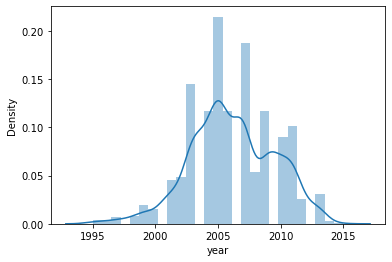

In [76]:
sns.distplot(data_3['year'])

Text(0.5, 1.0, 'EngineV Distribution Plot')

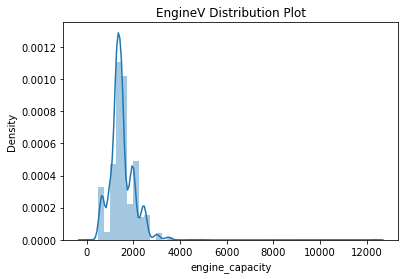

In [77]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(df['engine_capacity'])
plt.title('EngineV Distribution Plot')

In [96]:
data_3['engine_capacity']

0       1240
1       1200
2       2000
3       1990
4        660
        ... 
2288    2000
2289    1500
2290     650
2291    1300
2292    2350
Name: engine_capacity, Length: 2247, dtype: int64

In [97]:
# Car engine volumes are usually (always?) below 6.5l, You can google it
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_4 = data_3[data_3['engine_capacity']<4000]

<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

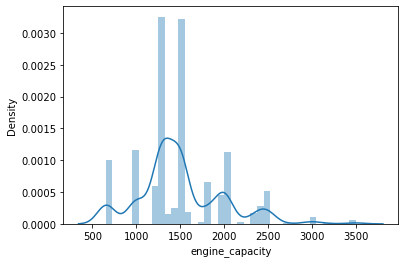

In [98]:
# now its looks kind of normal
sns.distplot(data_4['engine_capacity'])

In [99]:
# Reset index
cleaned_data = data_4.reset_index(drop=True)

In [100]:
# once again checking discriptive statistics
cleaned_data.describe()

,id,price,year,mileage,engine_capacity
count,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000
mean,1153.441425,965.590646,2006.128731,97386.979510,1497.175947
std,667.196422,286.905079,3.359996,42615.337115,479.939949
min,0.000000,80.000000,1995.000000,2000.000000,650.000000
25%,574.000000,775.000000,2004.000000,67000.000000,1300.000000
50%,1153.000000,1000.000000,2006.000000,93000.000000,1490.000000
75%,1733.000000,1213.000000,2009.000000,123000.000000,1794.000000
max,2310.000000,1399.000000,2015.000000,241608.000000,3500.000000


Text(0.5, 1.0, 'Price and engine_capacity')

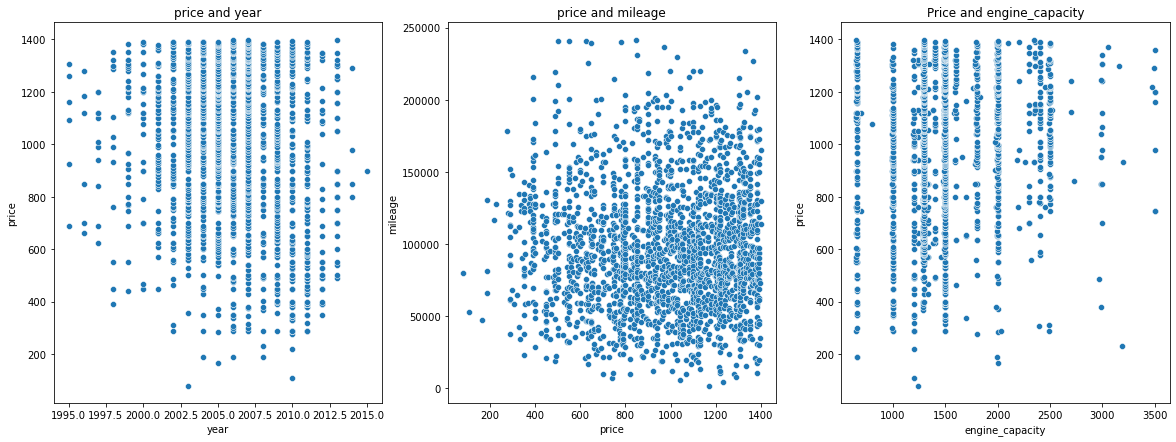

In [102]:
#   lets check the linearity using a scatter plot
#  Scatter Plot of independent variables vs dependent variables

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("price and year")
sns.scatterplot(x='year',y='price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("price and mileage")
sns.scatterplot(x='price',y='mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='price',x='engine_capacity',data=cleaned_data)
plt.title("Price and engine_capacity")

In [103]:
#    we can spot patterns but definitely not perfect linear once. 
#    we know we should not run a linear regression in this case. 
#    we should first transform one or more variables recall the ditribution plot of price to all these plot are pointing 
#    us towards the idea that price is not normally distributed.

#    And from there its relationships with the other rather normally distributed features is not linear.

<AxesSubplot:xlabel='price', ylabel='Density'>

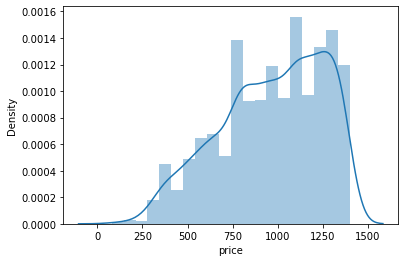

In [104]:
#recall the distribution plot of price
sns.distplot(cleaned_data['price'])

In [105]:
# See The patterns are quite exponentials in this condition log transformation is a common way to deal with this issue. 
# log transformation is especially useful when facing exponential scatter plots like we do now.

In [106]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,log_price
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,4.382027
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,4.700480
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,5.105945
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,5.247024
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,5.247024


Text(0.5, 1.0, 'Log price and engine_capacity')

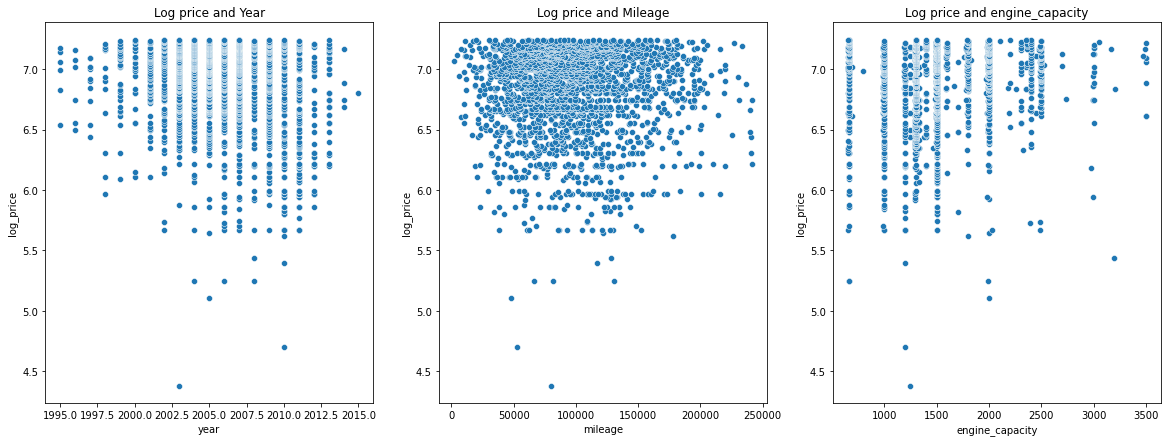

In [107]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='engine_capacity',data=cleaned_data)
plt.title("Log price and engine_capacity")

# The relationships show a clear linear relationship
# This is some good linear regression material

In [108]:
# Since we will be using the log price variable, we can drop the old 'Price' one
cleaned_data = cleaned_data.drop(['price'],axis=1)

In [110]:
#   Checking Multicollinearity Using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['mileage','year','engine_capacity']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,6.307718,mileage
1,14.507217,year
2,10.845720,engine_capacity


In [111]:
#   Fixing Multicollinearity:

# 'Year' has high VIF so we are just droping that column
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('year',axis=1)

In [112]:
data_no_multicolinearity.head()

,id,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,log_price
0,0,nissan,march,80000,1240,at,2wd,rhd,gasoline,4.382027
1,1,nissan,march,53000,1200,at,2wd,rhd,gasoline,4.700480
2,2,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,5.105945
3,3,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,5.247024
4,4,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,5.247024


In [113]:
#  Feature Selection
#  Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

id                 0.921191
engine_capacity    0.169799
mark               0.088398
hand_drive         0.054997
transmission       0.037388
drive              0.036056
model              0.032425
fuel               0.028804
mileage            0.000033
dtype: float64


<AxesSubplot:>

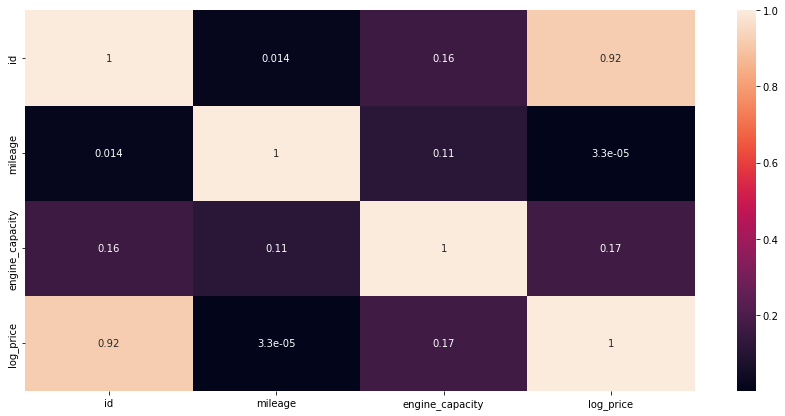

In [114]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [115]:
#  Feature Importance

#  Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

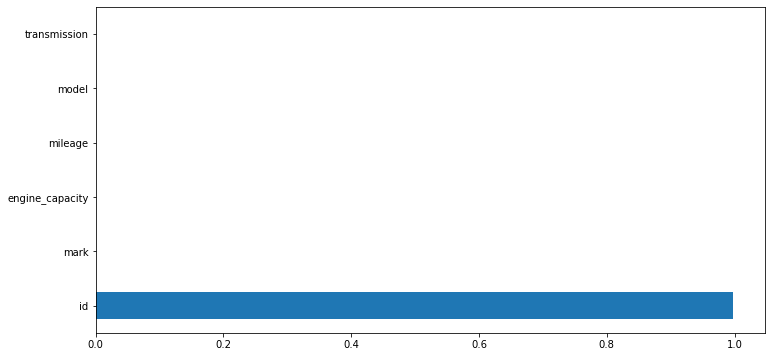

In [116]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [117]:
print(feat_importances.sort_values(ascending=False))


id                 9.978752e-01
mark               6.587543e-04
engine_capacity    5.737169e-04
mileage            5.070067e-04
model              2.808628e-04
transmission       5.473299e-05
drive              4.850829e-05
hand_drive         9.935917e-07
fuel               1.937332e-07
dtype: float64


In [118]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [119]:
data_with_dummies.head()

,id,mileage,engine_capacity,log_price,mark_bmw,mark_chrysler,mark_citroen,mark_daihatsu,mark_ford,mark_gm,...,model_zest,transmission_cvt,transmission_mt,drive_4wd,drive_awd,hand_drive_rhd,fuel_diesel,fuel_gasoline,fuel_hybrid,fuel_lpg
0,0,80000,1240,4.382027,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,53000,1200,4.700480,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2,47690,2000,5.105945,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3,130661,1990,5.247024,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,4,66300,660,5.247024,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [120]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['mileage','engine_capacity']])

StandardScaler()

In [122]:
# It is not usually recommended to standardize dummy variables
#For ML purposes we rarely put too much thought into it and go with the scale dummies as 
#scaling has no effect on their predictive power.
inputs_scaled = scaler.transform(x[['mileage','engine_capacity']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['mileage','engine_capacity'])

In [123]:
input_scaled2 =scaled_data.join(x.drop(['mileage','engine_capacity'],axis=1))

In [124]:
#  training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [129]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : -3533908433708931.5
RMSE : 22026295.965113617


In [130]:
#Random Forest Regressor Model
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9995014426794181
RMSE : 0.008273159039682992


In [131]:
# GBT Regressor Model
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9978585929990841
RMSE : 0.017146024240537242


In [132]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.002437942301216312
MSE: 0.0002939861472570907
RMSE: 0.017146024240537242


In [133]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
444,940.08,940.00,-0.08,0.01
445,650.06,650.00,-0.06,0.01
446,1054.33,1050.00,-4.33,0.41
447,1380.68,1381.00,0.32,0.02
448,650.08,650.00,-0.08,0.01
